In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
potential = lambda x: (x ** 4).sum() + x.sum() ** 2
potential = lambda x: 100 * ((x[1:] - x[:-1] ** 2) ** 2).sum() + ((1 - x) ** 2).sum()
potential = lambda x: ((x[1:] - x[:-1] ** 2) ** 2).sum() + ((1 - x) ** 2).sum() / 100
# potential = lambda x: (10 * torch.linalg.norm(x - 3) ** 2 + 10) * (torch.linalg.norm(x + 2) ** 2)
# potential = lambda x: (40 * torch.linalg.norm(2 * x - 0.5) ** 2 + 10) * (torch.linalg.norm(2 * x + 2) ** 2)

In [3]:
boundary_val = 10

In [101]:
num_iters = 10_000
dim = 25

D_temp = torch.zeros(dim, dtype=torch.float64) + 1
C = torch.diag(D_temp)
v = np.array([1, 0, 1]) * 0.1

particle = torch.tensor(np.ones(dim) * -5, dtype=torch.float64, requires_grad=True)
direction = torch.zeros(dim, dtype=torch.float64)
alpha = 0.1

In [102]:
is_valid = lambda x: abs(x).max() <= 10

In [103]:
v = np.ones(2 * dim) * 0.1

In [116]:
# D_temp = torch.ones(dim, dtype=torch.float64)
best_val = np.inf
best_particle = None
num_invalid_moves = 0

history = torch.zeros(num_iters, dim)
history_val = torch.zeros(num_iters)
for i in range(num_iters):
    val = potential(particle)
    history_val[i] = val
    
    if val < best_val:
        best_val = val
        best_particle = particle.detach().clone()
    
    val.backward()
    
    d = -C @ particle.grad + np.sqrt(2) * torch.randn_like(particle) * 0.01
    k = torch.argmax(abs(d))
        
    with torch.no_grad():
        particle[k] += 1 if d[k] > 0 else -1
        D_temp = (1 - alpha) * D_temp + alpha * particle.grad ** 2

        # C = torch.diag(1 / torch.sqrt(D_temp))
        # sqrt_C = torch.diag(1 / torch.sqrt(torch.sqrt(D_temp)))
        # v = torch.concatenate([D_temp, D_temp]).detach().numpy()

        if not is_valid(particle):
            num_invalid_moves += 1
            particle[k] += -1 if d[k] > 0 else 1
        history[i] = particle
    
    if i % 1000 == 0:
        print(f"Iteration {i}: {best_val.detach().numpy()}")
    
    particle.grad.zero_()
print(f"Iteration {i}: {best_val.detach().numpy()}")
history = history.numpy()
history_val = history_val.detach().numpy()

Iteration 0: 2.24
Iteration 1000: 0.25
Iteration 2000: 0.25
Iteration 3000: 0.25
Iteration 4000: 0.25
Iteration 5000: 0.25
Iteration 6000: 0.25
Iteration 7000: 0.25
Iteration 8000: 0.25
Iteration 9000: 0.25
Iteration 9999: 0.25


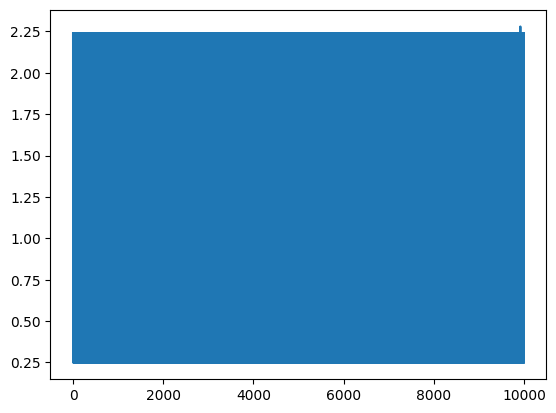

In [117]:
plt.plot(history_val)

In [87]:
# D_temp = torch.ones(dim, dtype=torch.float64)
best_val = np.inf
best_particle = None
num_invalid_moves = 0

history = torch.zeros(num_iters, dim)
for i in range(num_iters):
    val = potential(particle)
    
    if val < best_val:
        best_val = val
        best_particle = particle.detach().clone()
    
    val.backward()
    grad = particle.grad
    
    w = v.copy()
    for k in range(dim):
        if grad[k] > 0:
            w[dim + k] += grad[k]
        else:
            w[k] += abs(grad[k])
            
    has_moved = False
    while not has_moved:
        with torch.no_grad():
            k = np.random.choice(range(2 * dim), p=w / w.sum())
            
            particle[k % dim] += 1 if k < dim else -1
            history[i] = particle
            D_temp = (1 - alpha) * D_temp + alpha * particle.grad ** 2
            D_temp = torch.clip(D_temp, 1e-5, 1e4)
            
            # C = torch.diag(1 / torch.sqrt(D_temp))
            # v = torch.concatenate([D_temp, D_temp]).detach().numpy()

            if not is_valid(particle):
                num_invalid_moves += 1
                particle[k % dim] += -1 if k < dim else 1
                w[k] = 0
            else:
                has_moved = True
    
    if i % 1000 == 0:
        print(f"Iteration {i}: {best_val.detach().numpy()}")
    
    particle.grad.zero_()
print(f"Iteration {i}: {best_val.detach().numpy()}")
history = history.numpy()

Iteration 0: 2.24
Iteration 1000: 0.25
Iteration 2000: 0.25
Iteration 3000: 0.25
Iteration 4000: 0.25
Iteration 5000: 0.25
Iteration 6000: 0.25
Iteration 7000: 0.25
Iteration 8000: 0.25
Iteration 9000: 0.25
Iteration 9999: 0.25


In [88]:
num_invalid_moves

0

In [89]:
num_invalid_moves

0

In [90]:
w / w.sum()

array([0.00774194, 0.39612903, 0.13677419, 0.00774194, 0.00774194,
       0.00774194, 0.00774194, 0.00774194, 0.00774194, 0.00774194,
       0.00774194, 0.00774194, 0.00774194, 0.00774194, 0.00774194,
       0.00774194, 0.00774194, 0.00774194, 0.00774194, 0.00774194,
       0.00774194, 0.00774194, 0.00774194, 0.00774194, 0.00645161,
       0.00645161, 0.00645161, 0.00645161, 0.00645161, 0.00645161,
       0.00645161, 0.00645161, 0.00645161, 0.00645161, 0.00645161,
       0.00645161, 0.00645161, 0.00645161, 0.00645161, 0.00645161,
       0.00645161, 0.00645161, 0.00645161, 0.00645161, 0.00645161,
       0.00645161, 0.00645161, 0.00645161, 0.00645161, 0.13548387])

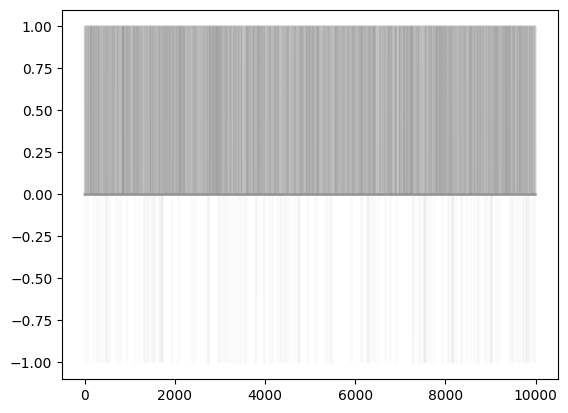

In [84]:
for i in range(dim):
    plt.plot(history[:, i], color='black', alpha=0.02)

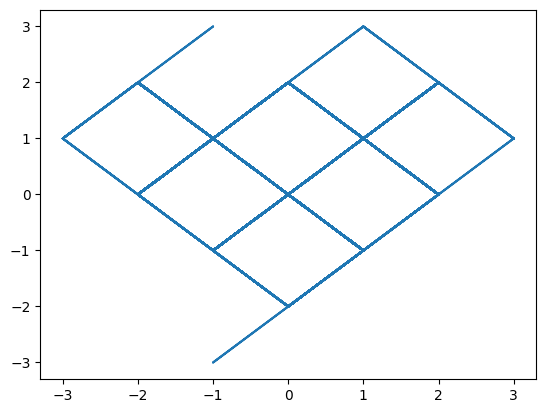

In [45]:
plt.plot(history[:, 0], history[:, 1])

In [24]:
max_val = abs(history).max()
val = int(max_val)

In [25]:
heat_map = np.zeros((2 * val + 1, 2 * val + 1))
for i in range(num_iters):
    j, k = history[i] + val
    heat_map[int(j), int(k)] += 1

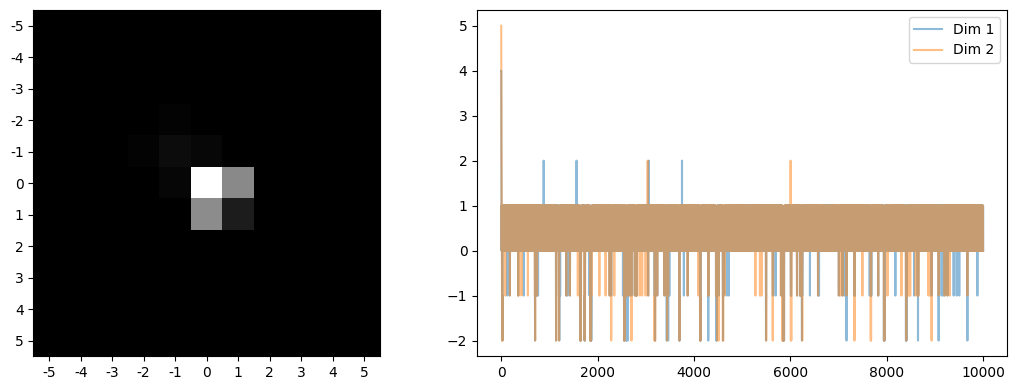

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

axs[0].imshow(heat_map, cmap='gray')
axs[0].set_xticks(np.arange(2 * val + 1), np.arange(-val, val + 1))
axs[0].set_yticks(np.arange(2 * val + 1), np.arange(-val, val + 1));

axs[1].plot(history[:, 0], alpha=0.5, label='Dim 1')
axs[1].plot(history[:, 1], alpha=0.5, label='Dim 2')
axs[1].legend()
plt.tight_layout();

In [27]:
f = np.zeros((2 * val + 1, 2 * val + 1))
for i in range(-val, val + 1):
    for j in range(-val, val + 1):
        f[i + val, j + val] = potential(torch.tensor([i, j], dtype=torch.float64))

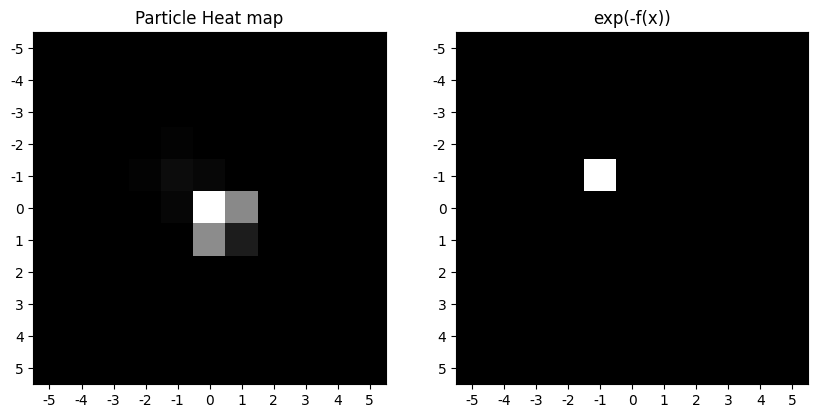

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(heat_map, cmap='gray')
axs[0].set_xticks(np.arange(2 * val + 1), np.arange(-val, val + 1))
axs[0].set_yticks(np.arange(2 * val + 1), np.arange(-val, val + 1))
axs[0].set_title('Particle Heat map')

axs[1].imshow(np.exp(-f + f.min()), cmap='gray')
axs[1].set_xticks(np.arange(2 * val + 1), np.arange(-val, val + 1))
axs[1].set_yticks(np.arange(2 * val + 1), np.arange(-val, val + 1))
axs[1].set_title('exp(-f(x))');

In [39]:
particle

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64,
       requires_grad=True)

In [20]:
potential(particle)

tensor(477.7700, dtype=torch.float64, grad_fn=<AddBackward0>)

In [21]:
D_temp

tensor([4.0000e-04, 4.0000e-04, 1.4448e+02, 8.8435e+03, 1.4400e+02, 4.0804e+00,
        3.6000e+01, 1.8507e+04, 4.9084e+03, 1.3003e+03, 4.0000e+00, 6.4642e+01,
        4.0804e+00, 1.3014e+04, 3.2472e+02, 6.0902e+03, 7.0627e+03, 2.5600e+02,
        0.0000e+00, 0.0000e+00, 6.4000e+01, 1.6322e+01, 6.4000e+01, 1.5682e+01,
        1.6322e+01], dtype=torch.float64)

In [22]:
w

array([2.        , 2.        , 1.        , 1.        , 2.        ,
       2.        , 2.        , 1.        , 2.        , 2.        ,
       1.        , 5.73383085, 4.97029703, 2.        , 2.        ,
       1.        , 1.        , 2.        ,        nan,        nan,
       1.        , 2.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 2.        , 2.        , 1.        ,
       1.        , 1.        , 2.        , 1.        , 1.        ,
       4.        , 1.        , 1.        , 1.        , 1.        ,
       2.        , 2.        , 1.        , 1.        , 1.        ,
       2.        , 1.        , 2.        , 2.        , 2.        ])

In [244]:
particle

tensor([-1.,  0.,  0., -1.,  0.,  0., -1., -1.,  0.,  0.], dtype=torch.float64,
       requires_grad=True)

In [255]:
grad

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

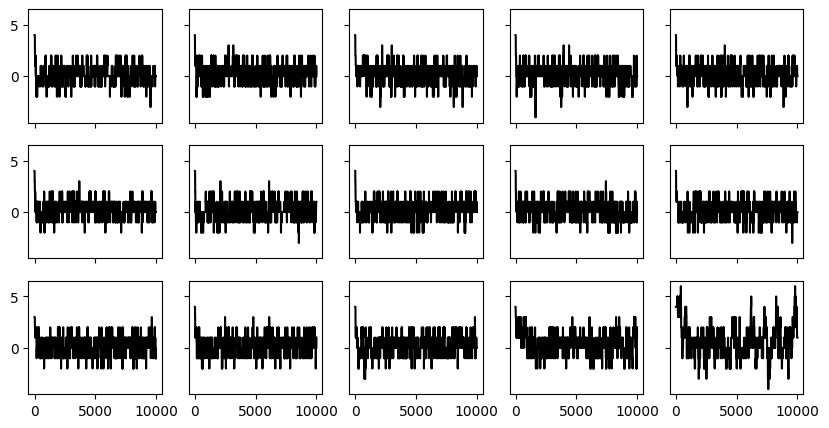

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5), sharex=True, sharey=True)
axs = axs.flatten()

for i in range(15):
    axs[i].plot(history[:, i], color='black')

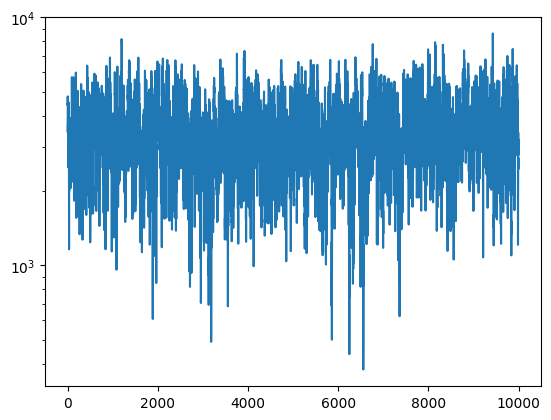

In [292]:
vals = np.array([potential(history[i]) for i in range(num_iters)])
plt.plot(vals)
plt.yscale('log')

In [296]:
history

array([[ 3.,  3.,  4., ...,  5.,  5.,  4.],
       [ 4.,  4.,  4., ...,  5.,  4.,  5.],
       [ 4.,  4.,  3., ...,  4.,  5.,  5.],
       ...,
       [ 2.,  1.,  1., ..., -2.,  1.,  3.],
       [ 1.,  1.,  0., ..., -3.,  2.,  4.],
       [ 2.,  2., -1., ..., -2.,  3.,  4.]],
      shape=(10000, 25), dtype=float32)

In [293]:
np.argmin(vals)

np.int64(6556)

In [294]:
np.array([potential(history[i]) for i in range(num_iters)]).min()

np.float32(379.92)

In [295]:
potential(np.ones(dim))

np.float64(0.0)

In [263]:
history

array([[ 3.,  3.,  4., ...,  5.,  5.,  4.],
       [ 4.,  4.,  4., ...,  5.,  4.,  5.],
       [ 4.,  4.,  3., ...,  4.,  5.,  5.],
       ...,
       [ 2.,  1.,  1., ..., -2.,  1.,  3.],
       [ 1.,  1.,  0., ..., -3.,  2.,  4.],
       [ 2.,  2., -1., ..., -2.,  3.,  4.]],
      shape=(10000, 25), dtype=float32)